In [44]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
#reading csv file
df=pd.read_excel(r"C:\Users\Serigne\Desktop\Datasets\test\healthcare-dataset-stroke-data.xlsx")

#shape of dataset(schema 150 lignes et 5 colonnes)
print("Shape:",df.shape)

#column names
print("\nFeature:",df.columns)

Shape: (5110, 12)

Feature: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [45]:
#storing the feature matrix(x) and response vector (y): on va separer les variables explicatives et la variable a expliquer
x_train=df[df.columns[:-1]]
y_train=df[df.columns[-1]]
#printing 5 first rows of feature matix
print("\nFeature matrix:\n",x_train)
#printing 5 first rows of response matix
print("\nResponse vector:\n",y_train)


Feature matrix:
          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0           Private          Urban             228

In [46]:
#permet de transformer les variables qualitatives en variables qualitative
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['gender']=le.fit_transform(x_train['gender'])
x_train['ever_married']=le.fit_transform(x_train['ever_married'])
x_train['work_type']=le.fit_transform(x_train['work_type'])
x_train['Residence_type']=le.fit_transform(x_train['Residence_type'])
x_train['smoking_status']=le.fit_transform(x_train['smoking_status'])

print(x_train)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0             2               1             228.69  36.6    

In [47]:
#training the model on  training set
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:

y_pred=knn.predict(x_train)
from sklearn import metrics
#donne le taux d'efficacite
efficacite=metrics.accuracy_score(y_train,y_pred)
erreur=1-efficacite
print("efficacite du modele sur les exemples de test:",efficacite," soit",efficacite*100,"%")
print("erreur du modele sur les exemples de test:",erreur," soit",erreur*100,"%")

efficacite du modele sur les exemples de test: 0.9518590998043053  soit 95.18590998043052 %
erreur du modele sur les exemples de test: 0.048140900195694725  soit 4.8140900195694725 %


In [49]:
#Matrice de Confusion: permet de savoir les exemples aur lesquels le modele s'est trompe(les 6%)
conf=metrics.confusion_matrix(y_train,y_pred)
print('matrice de confusion\n',conf)

matrice de confusion
 [[4859    2]
 [ 244    5]]


Text(110.30937499999997, 0.5, 'classes reelles')

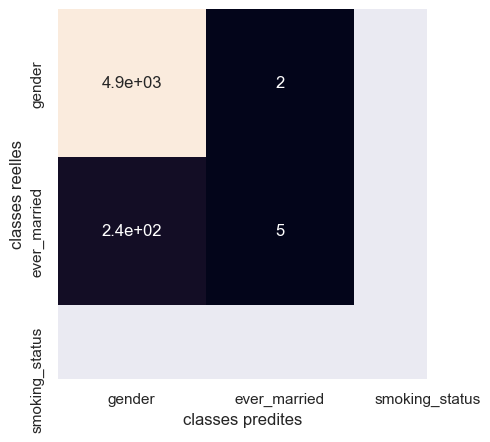

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(conf,square=True,annot=True,cbar=False
            ,xticklabels=list(['gender','ever_married','smoking_status'])
            ,yticklabels=list(['gender','ever_married','smoking_status']))
           
plt.xlabel('classes predites')
plt.ylabel('classes reelles')

In [53]:
print('matrice de confucion ')
result=metrics.classification_report(y_train,y_pred)
print('Classification Report ')
print(result)

matrice de confucion 
Classification Report 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.71      0.02      0.04       249

    accuracy                           0.95      5110
   macro avg       0.83      0.51      0.51      5110
weighted avg       0.94      0.95      0.93      5110



In [57]:
new_data=[[56669,1,81,0,0,1,2,1,186.21,29,2]] # =3, =5, =4 et =2
# nous allons utiliser la méthode predict sur notre model. Et nous allons fournir le new_data en parametre
preds=knn.predict(new_data)

print("La classe Species de notre new_data=[[56669,1,81,0,0,1,2,1,186.21,29,2]] , prédire par notre model est \n",preds)

La classe Species de notre new_data=[[3,5,4,2]] , prédire par notre model est 
 [0]


In [59]:
import pickle # pour la sauvegarde de model

In [61]:
pickle.dump(knn,open("KNN_Cardiovasculaire_model_obj","wb"))
Naive_Bayes_iris_model_from_pickle=pickle.load(open("KNN_Cardiovasculaire_model_obj","rb"))


In [68]:
import os
save_path= os.path.abspath(r'C:\Users\Serigne\Desktop\Datasets\test\Charts')

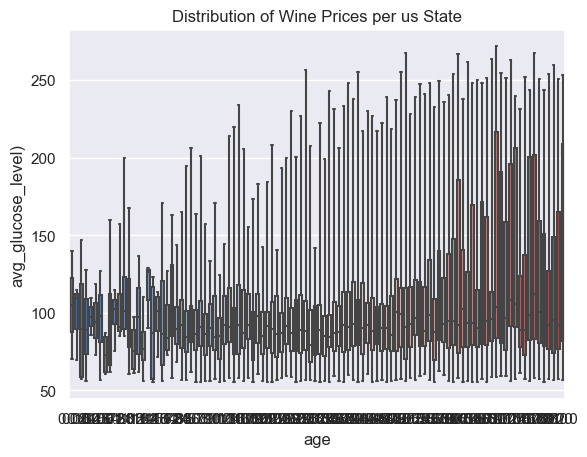

In [70]:
sns.boxplot(x='age',y='avg_glucose_level',data=df,whis=[0,100],width=.6,palette="vlag").set(title='Distribution of Wine Prices per us State',xlabel='age',

ylabel='avg_glucose_level)');
plt.savefig(save_path + '/avgglucoselevel_perAge_BXP.jpg')

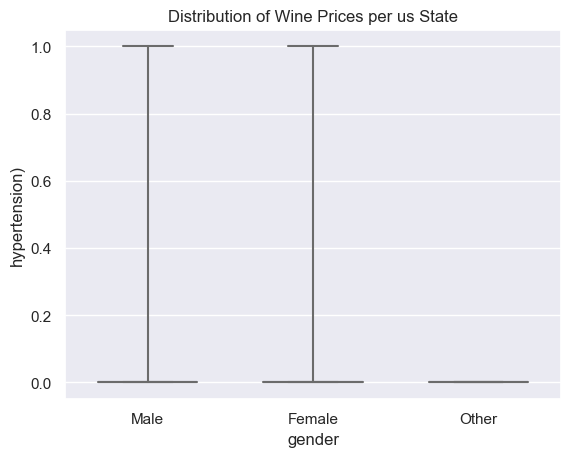

In [72]:
sns.boxplot(x='gender',y='hypertension',data=df,whis=[0,100],width=.6,palette="vlag").set(title='Distribution of Wine Prices per us State',xlabel='gender',

ylabel='hypertension)');
plt.savefig(save_path + '/avgglucoselevel_perAge_BXP.jpg')

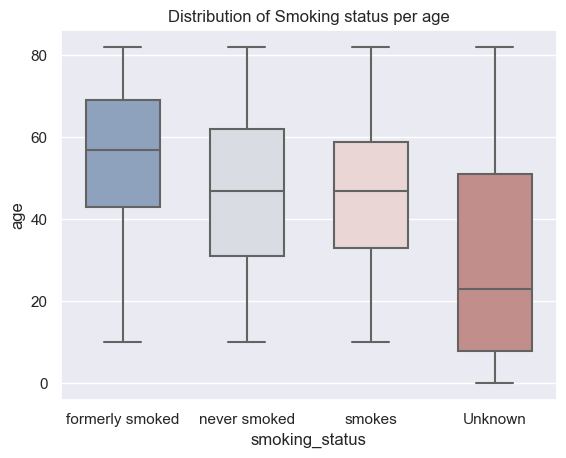

In [74]:
sns.boxplot(x='smoking_status',y='age',data=df,whis=[0,100],width=.6,palette="vlag").set(title='Distribution of Smoking status per age',xlabel='smoking_status',

ylabel='age');
plt.savefig(save_path + '/smokingStatus_perAge_BXP.jpg')

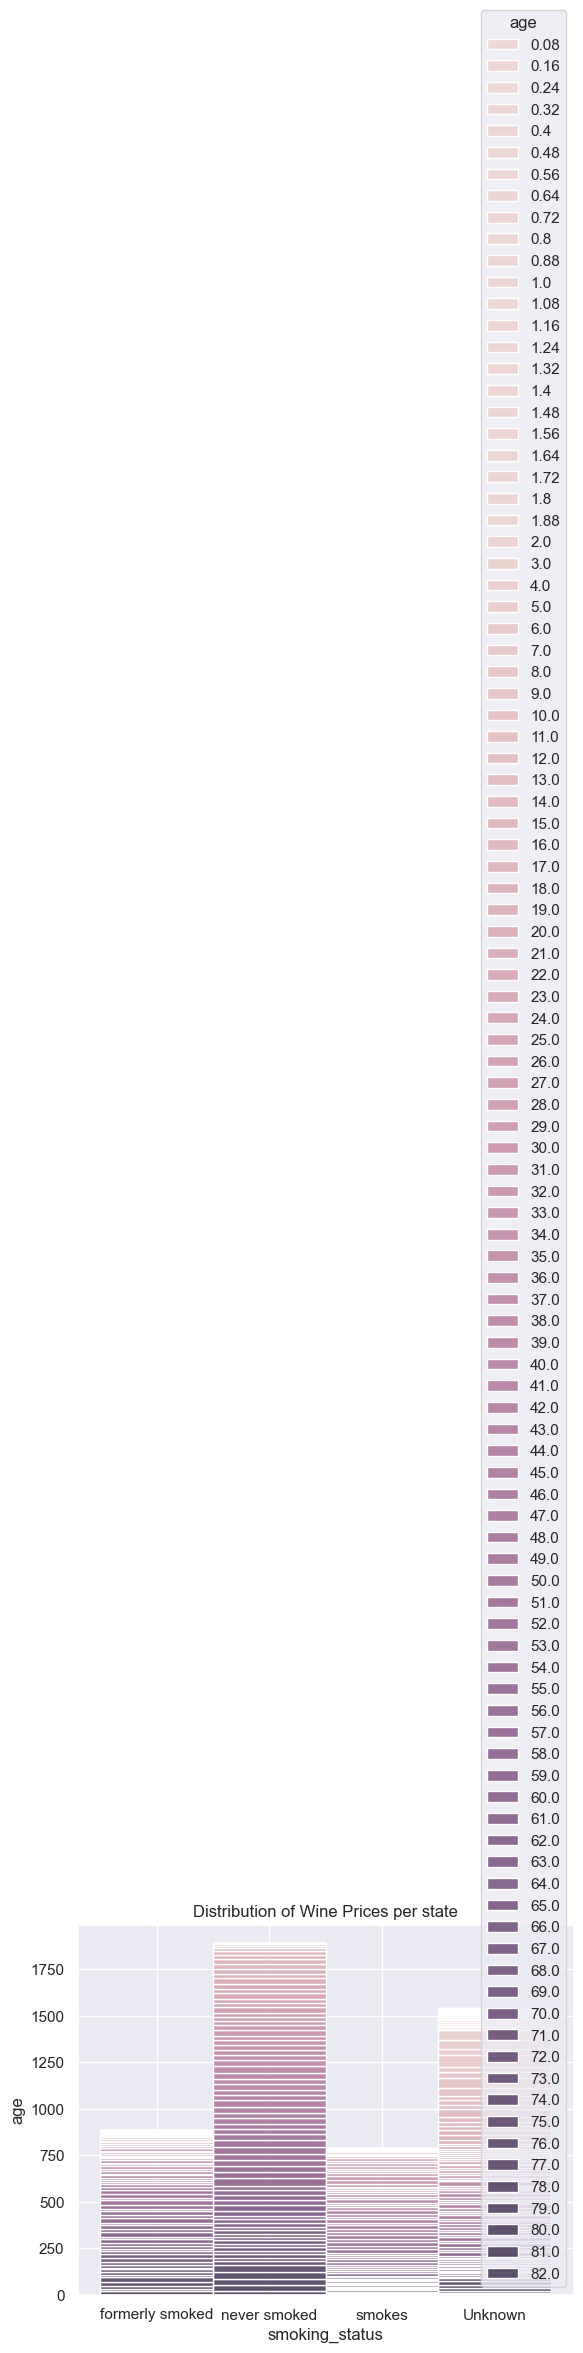

In [75]:
sns.histplot(df,x='smoking_status',hue='age',multiple='stack').set(title='Distribution of Smoking Status per age',xlabel='smoking_status',
                                                              ylabel='age')
plt.savefig(save_path + '/PriceperProvince_Hist.jpg')

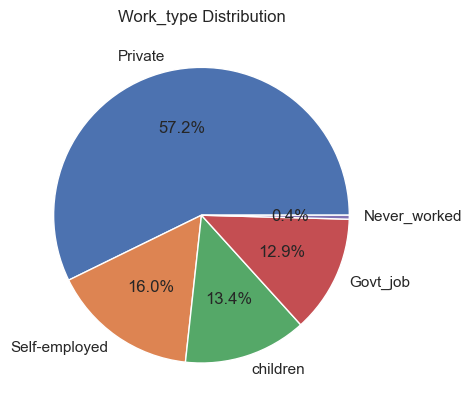

In [82]:
Work_type_count = df['work_type'].value_counts()


fig,ax = plt.subplots()
ax.pie(Work_type_count,labels=Work_type_count.index,autopct='%1.1f%%')
ax.set_title('Work_type Distribution')
plt.show()

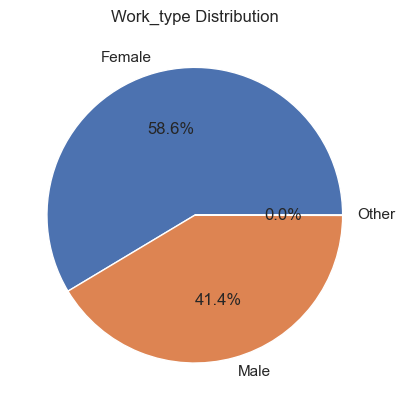

In [83]:
Work_type_count = df['gender'].value_counts()


fig,ax = plt.subplots()
ax.pie(Work_type_count,labels=Work_type_count.index,autopct='%1.1f%%')
ax.set_title('Work_type Distribution')
plt.show()

In [ ]:
Work_type_count = df['work_type'].value_counts()


fig,ax = plt.subplots()
ax.pie(Work_type_count,labels=Work_type_count.index,autopct='%1.1f%%')
ax.set_title('Work_type Distribution')
plt.show()

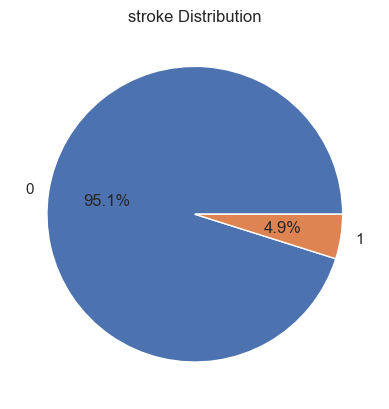

In [88]:
stroke_count = df['stroke'].value_counts()


fig,ax = plt.subplots()
ax.pie(stroke_count,labels=stroke_count.index,autopct='%1.1f%%')
ax.set_title('stroke Distribution')
plt.show()

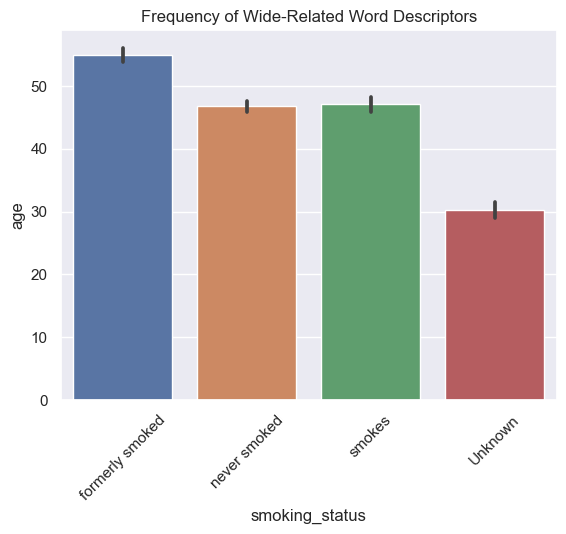

In [90]:

sns.barplot(data=df,x='smoking_status',y='age')
plt.xticks(rotation=45)
plt.title('smoking status Descriptors')
plt.xlabel('smoking_status');

plt.savefig(save_path + '/DescriptionFrequency_BAR.jpg')


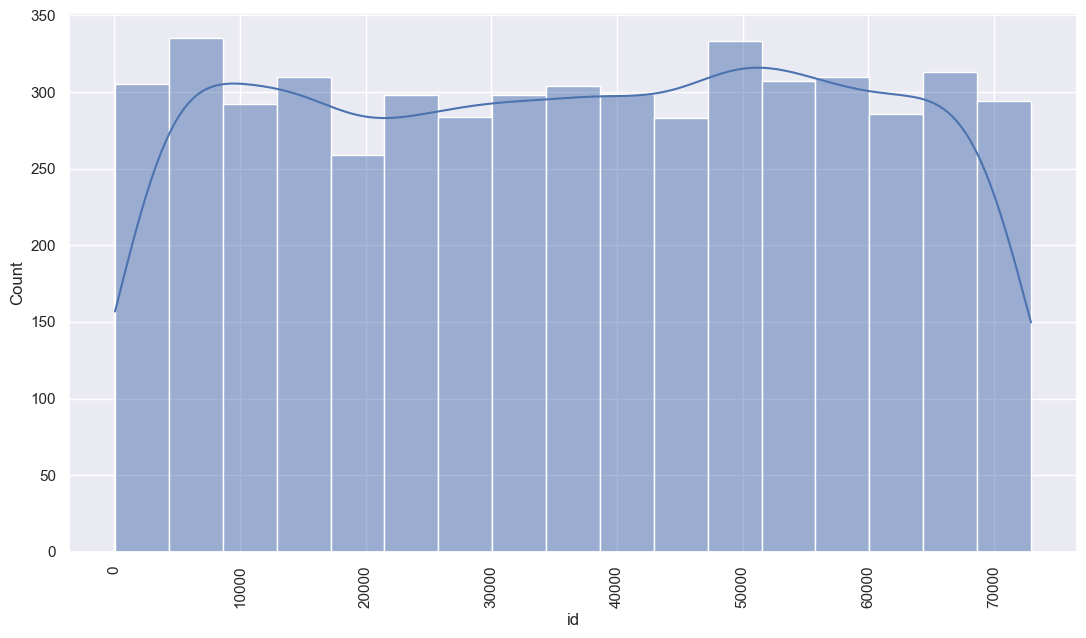

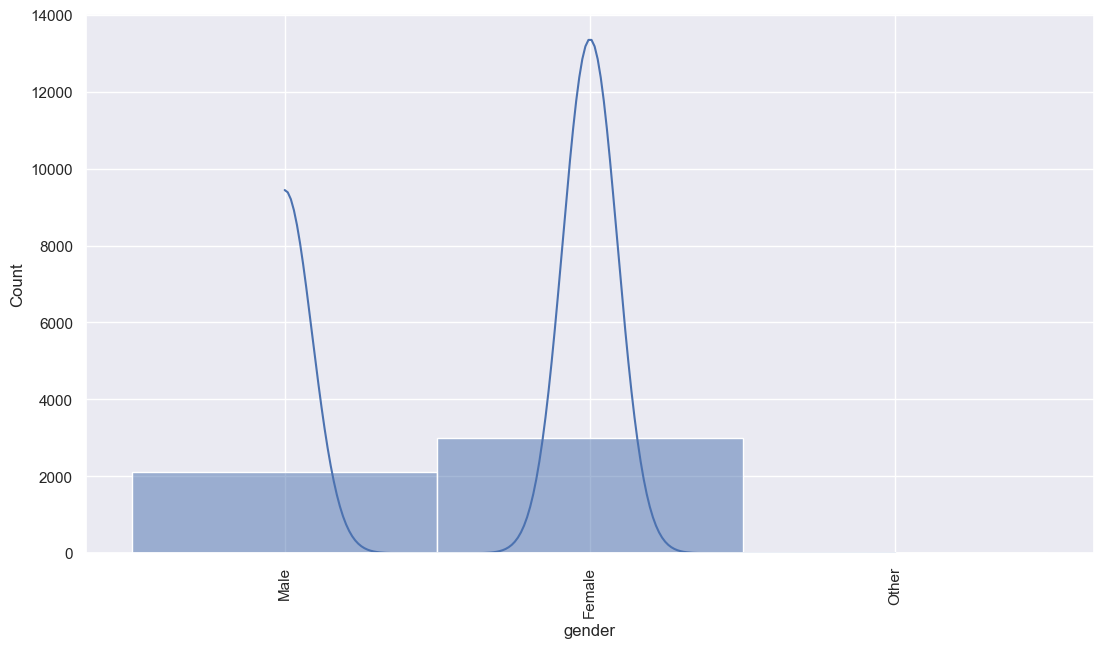

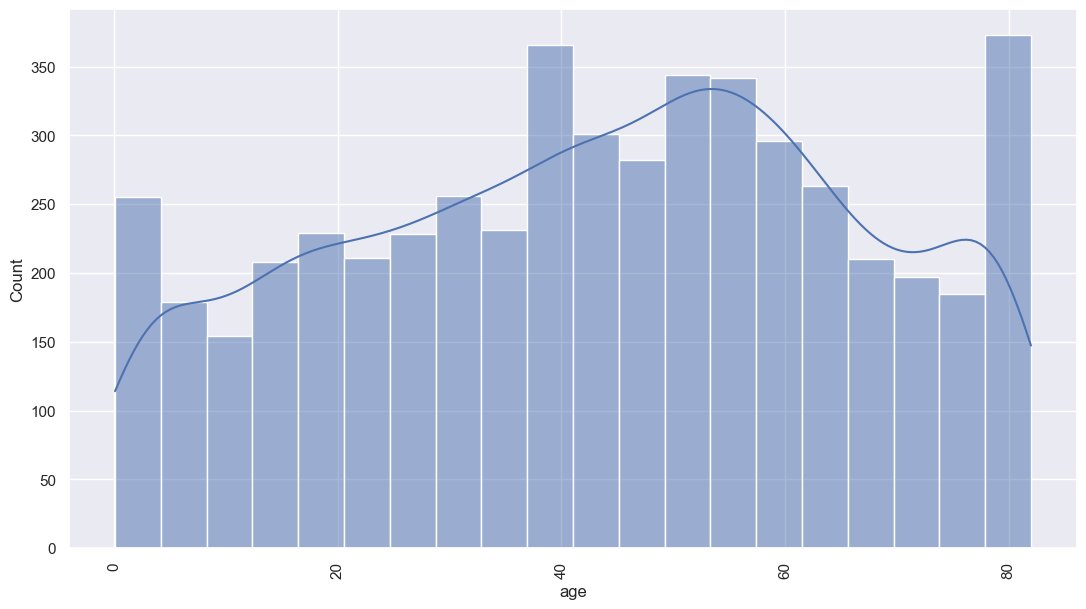

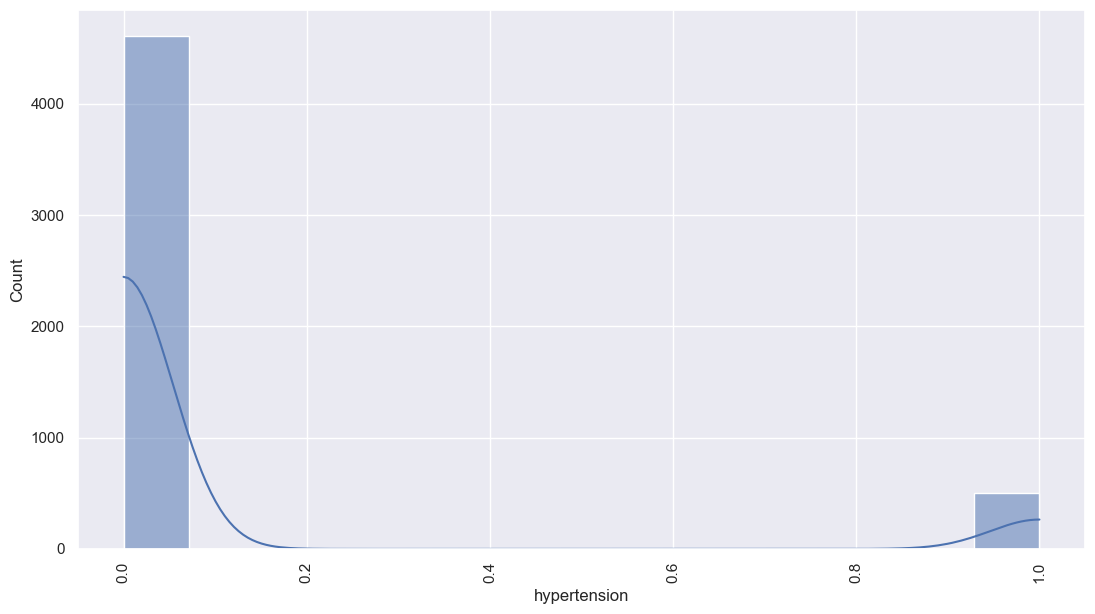

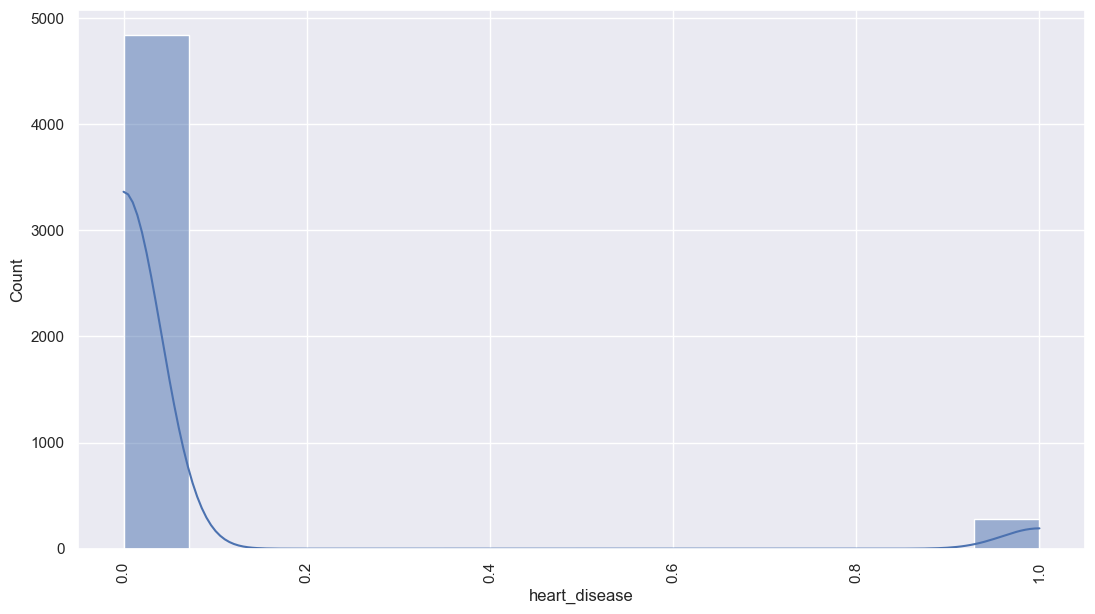

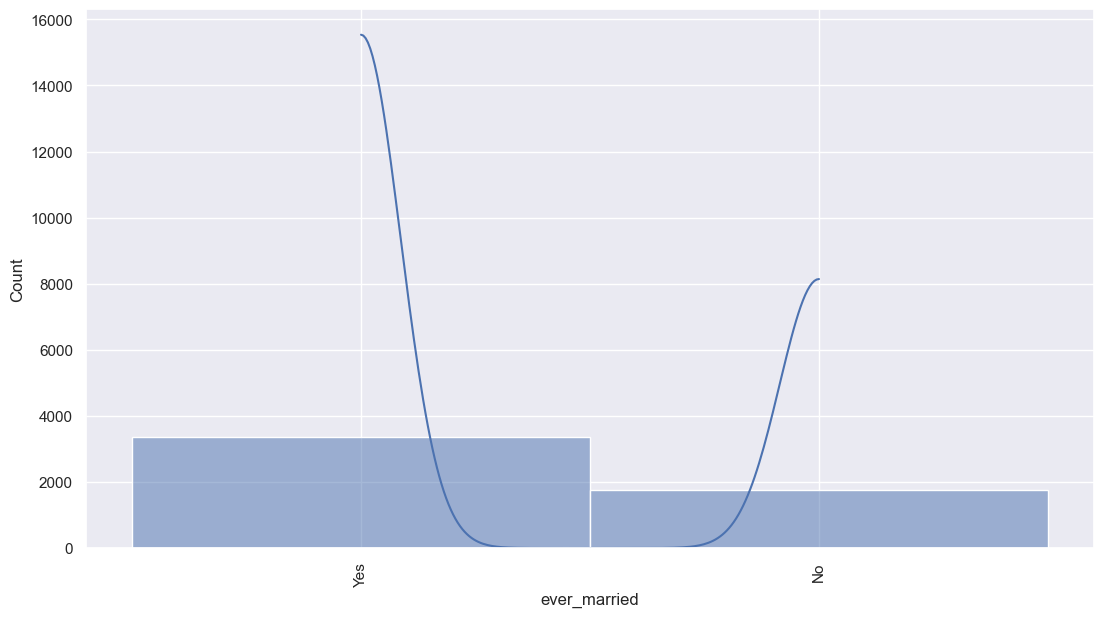

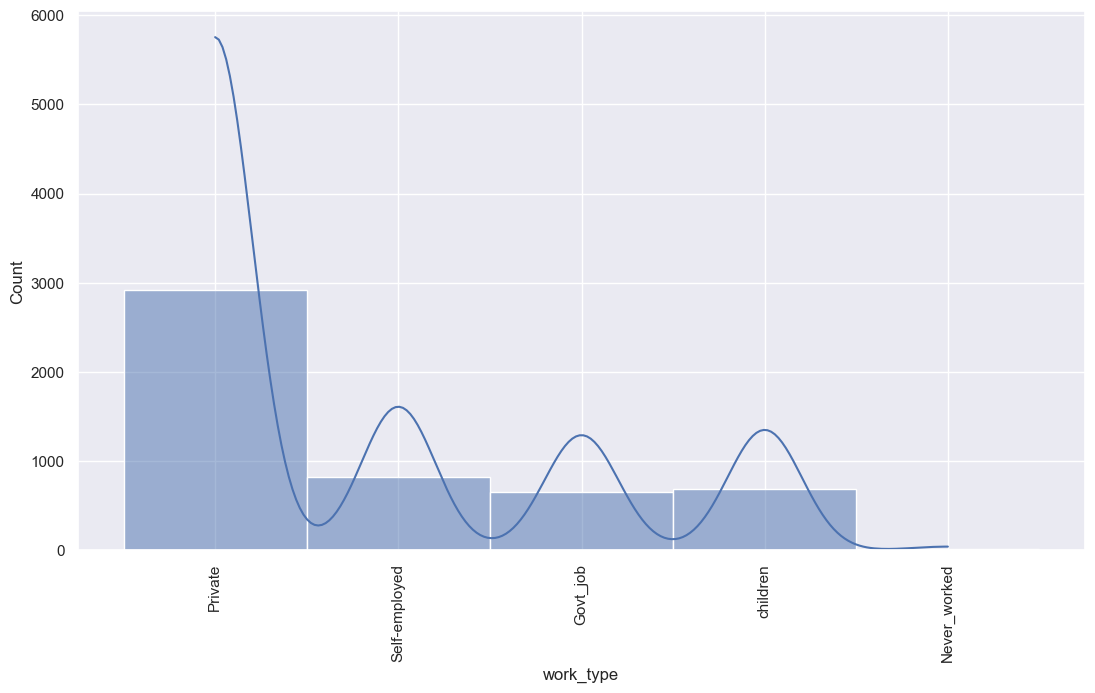

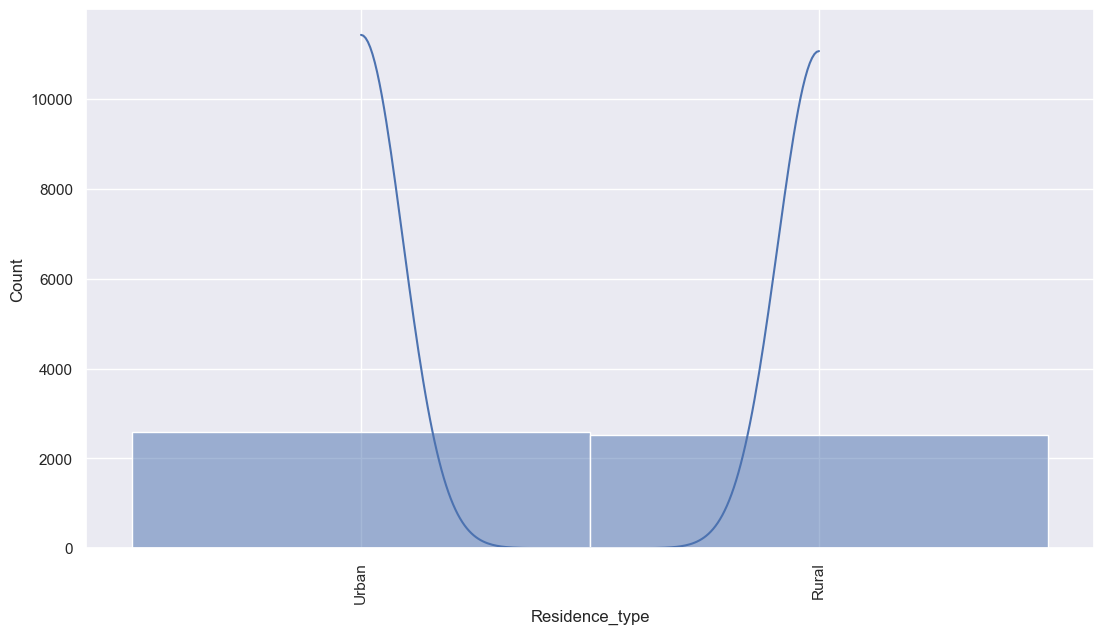

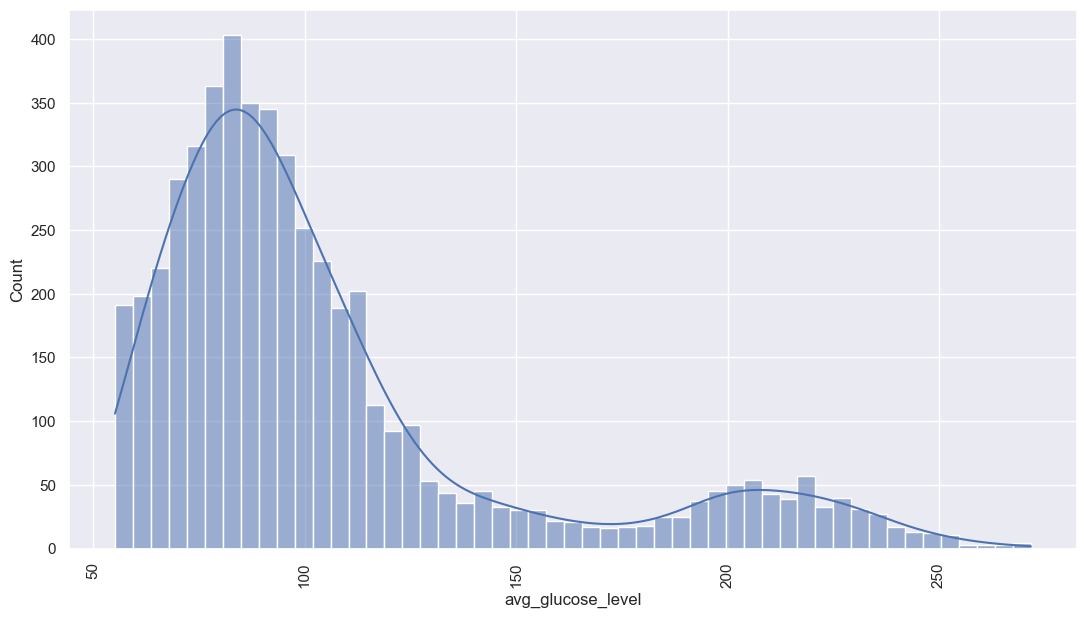

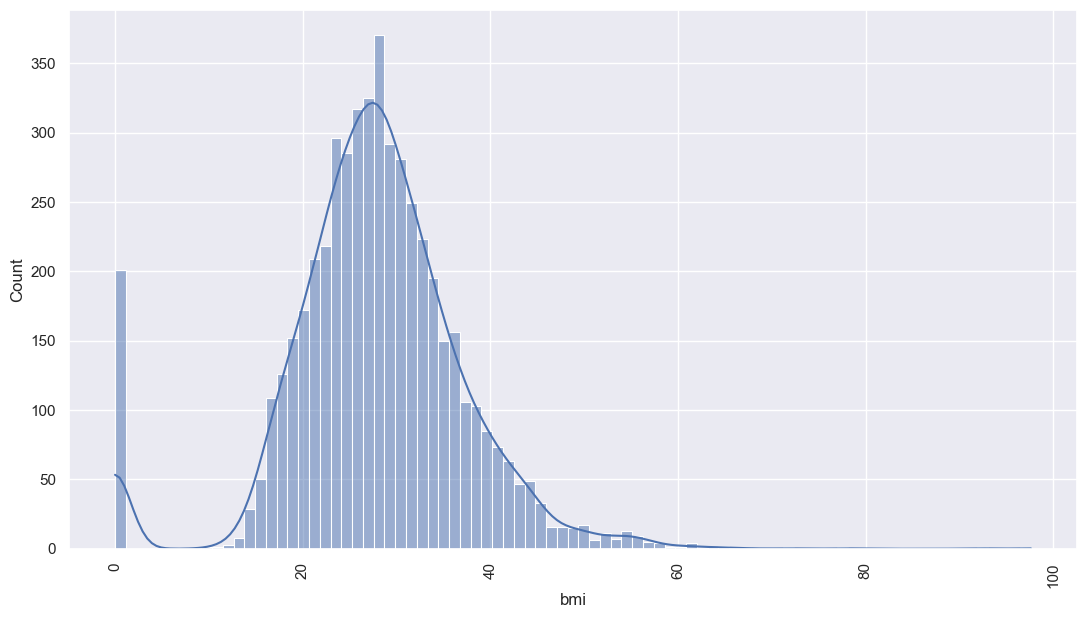

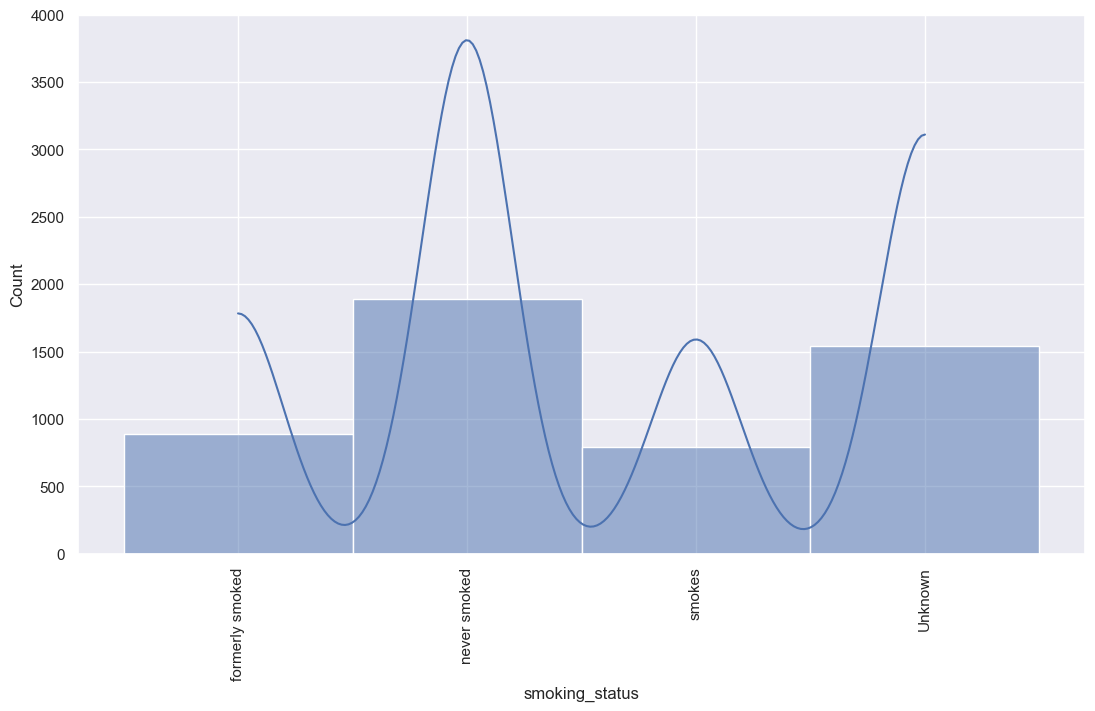

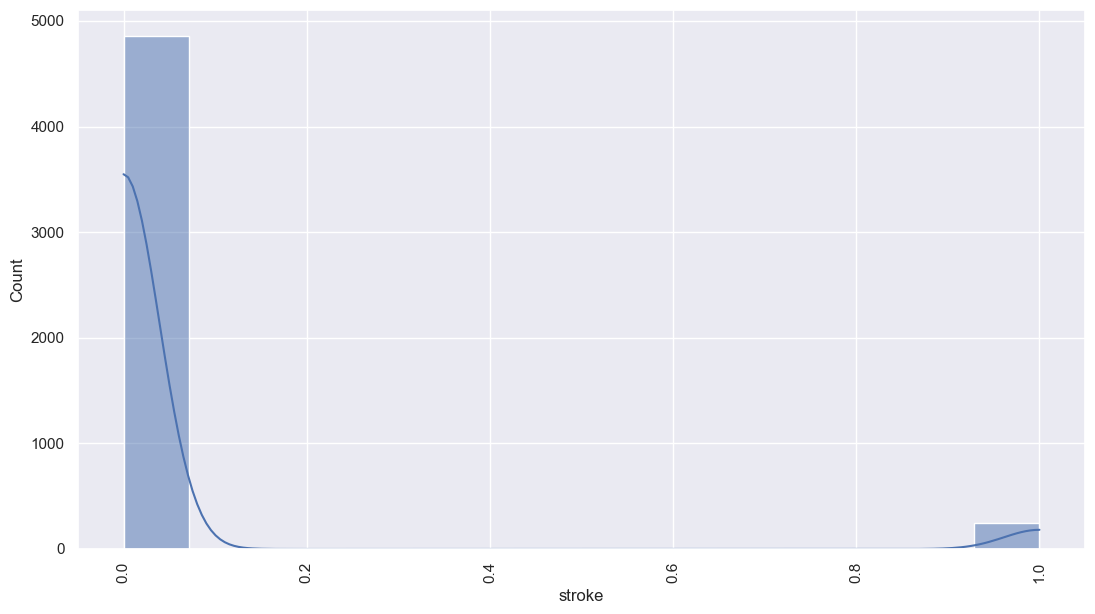

In [91]:
for i in df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data=df[i],kde=True,multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

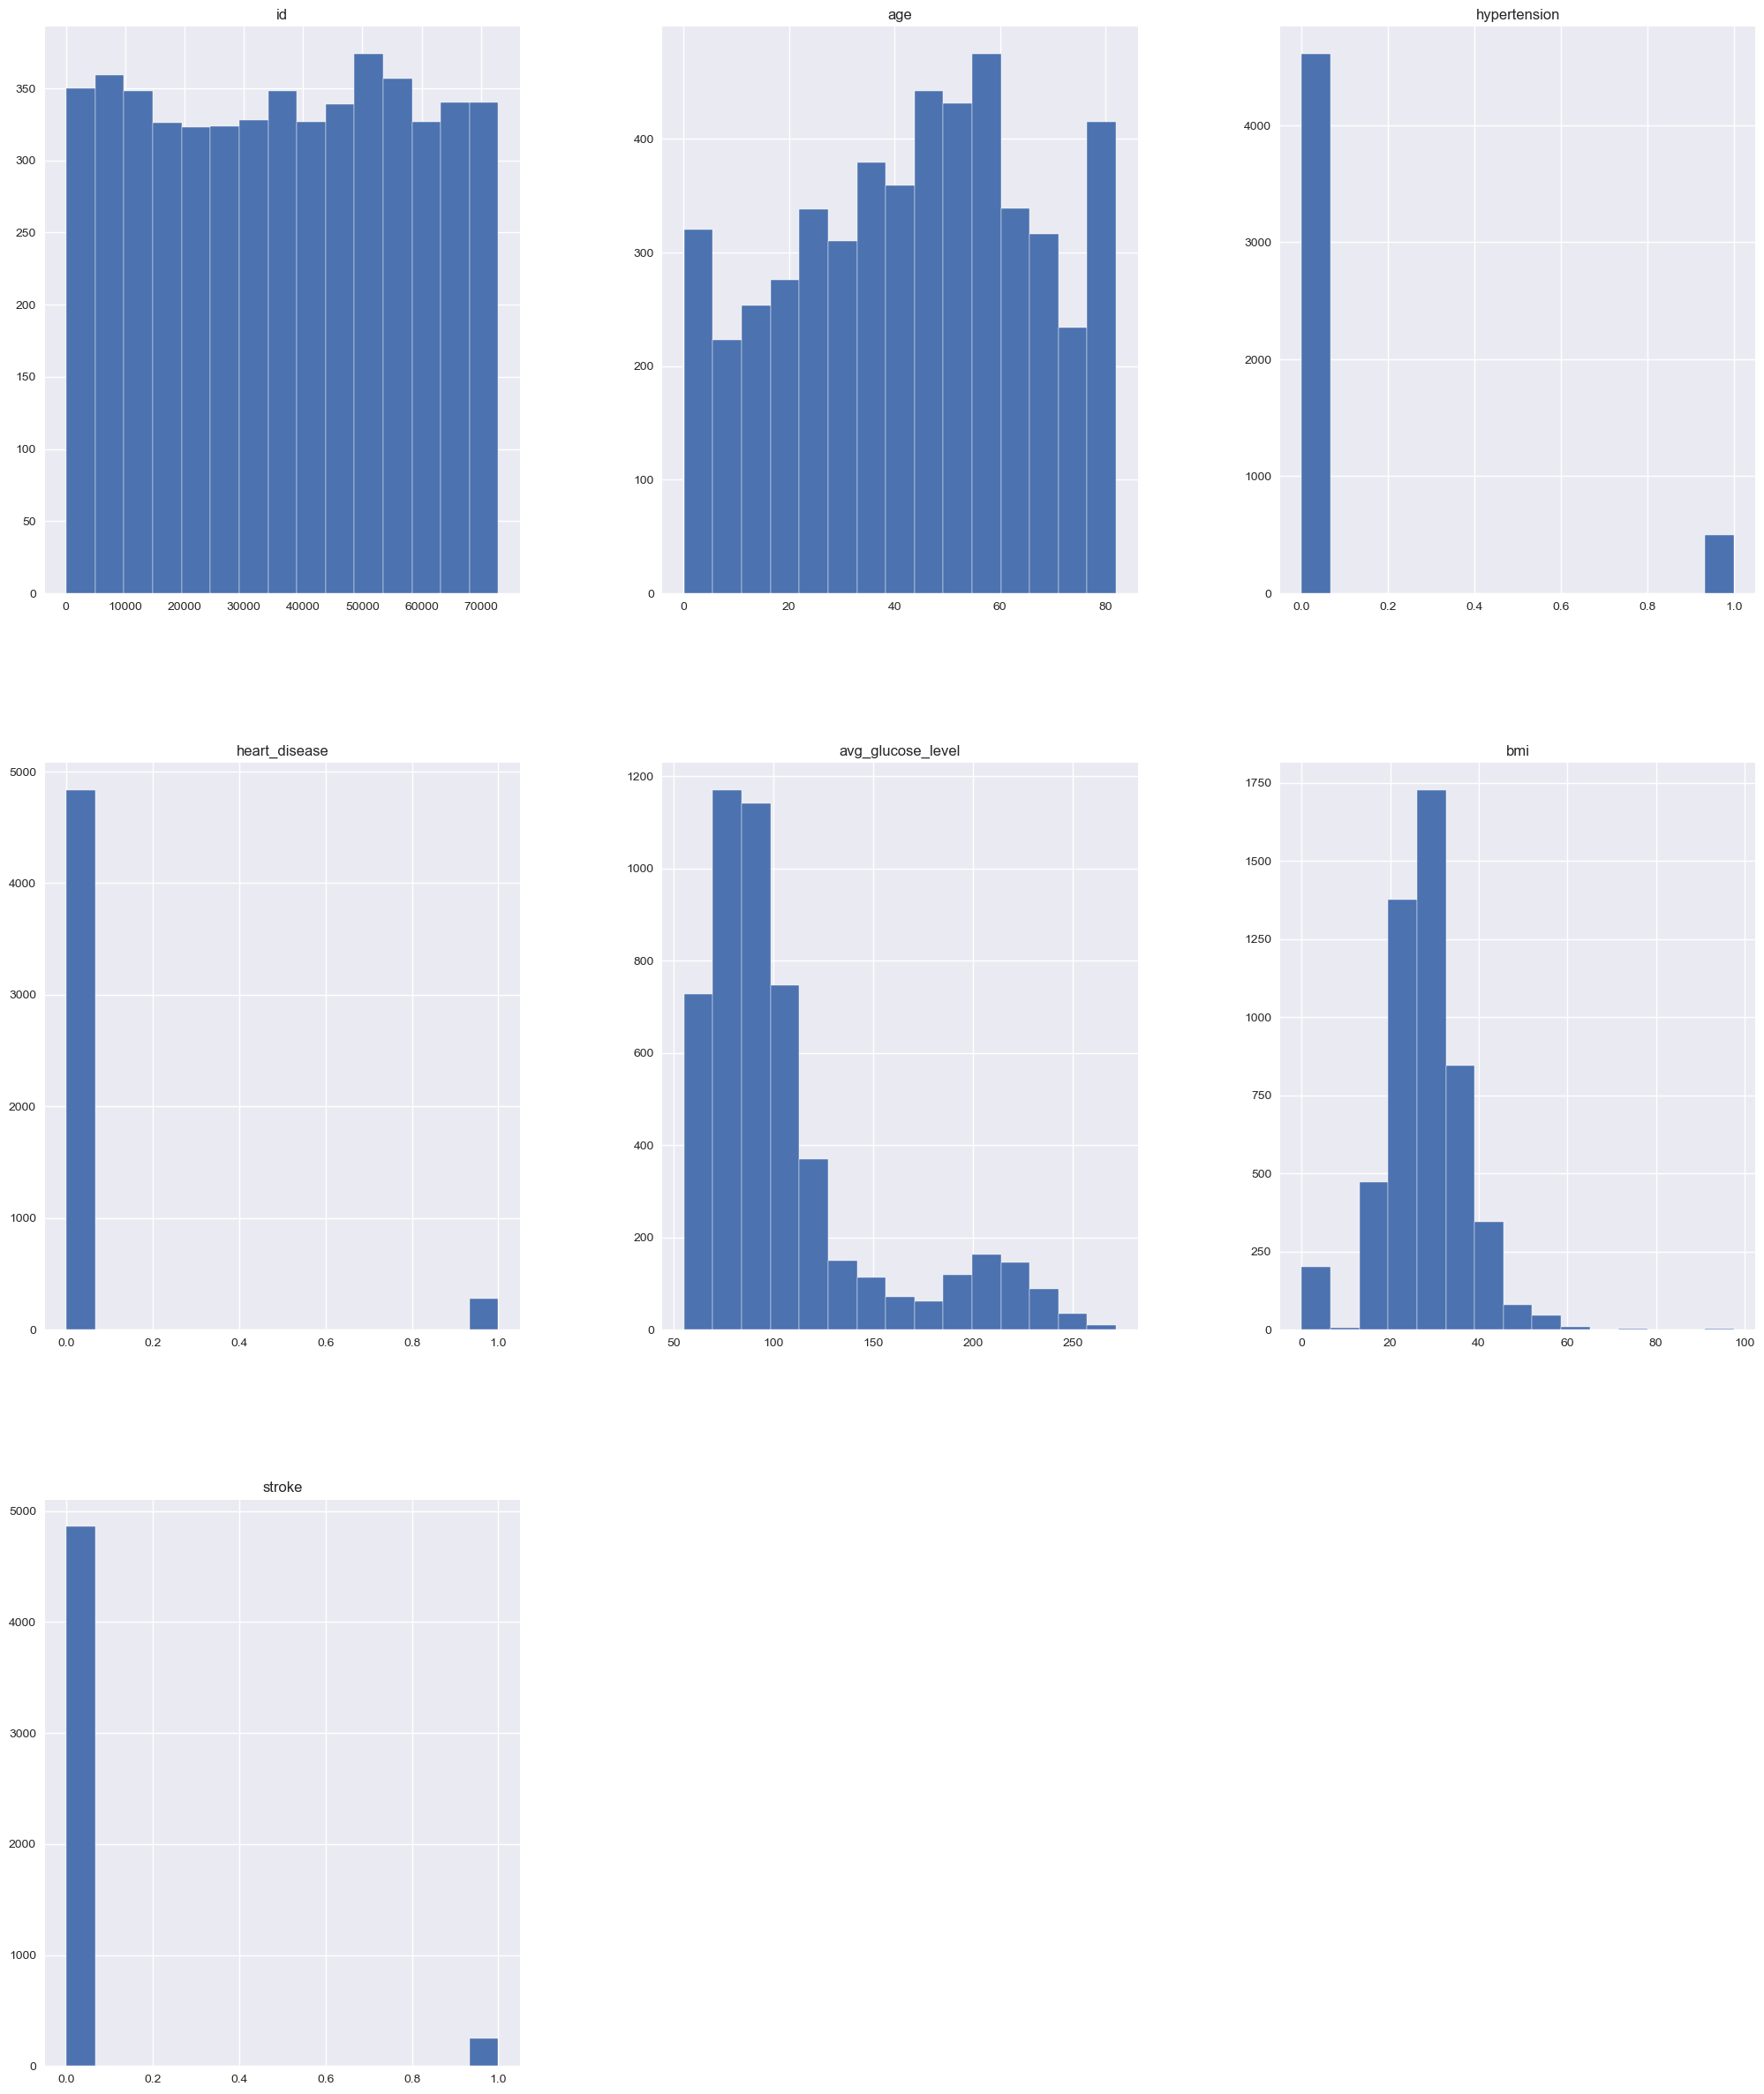

In [92]:
plt.style.use("seaborn")
df.hist(figsize=(25,30),bins=15)